# Describing Distributions (Core) 

Tijesunimi Odebode

5/6/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'data.csv'
df = pd.read_csv(filename)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


## 1. VitD_levels

a) Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

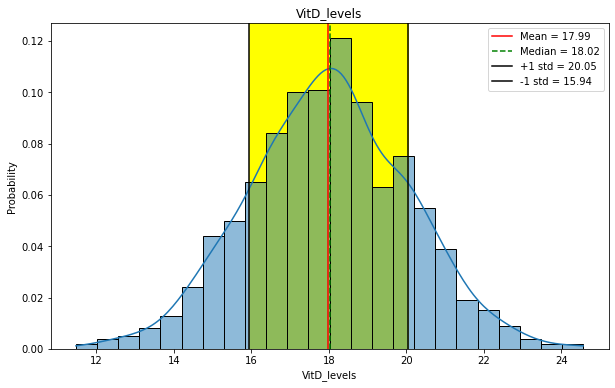

In [3]:
# Plot a histogram with a kde (kernel density estimate)
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability', kde = True)
ax.axvline(mean, color = 'red', label= f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(col)
ax.legend();

b) Answer the following questions:
- Is it Discrete or Continuous?

<b>Answer: It is continuous. The histogram bars do not have gaps in between them.

- Does it have a skew? If so, which direction (+/-)
    
<b>Answer: It does not have a skew
    
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    
<b>Answer: It displays 'Mesokurtic.'

In [4]:
# Confirm that there is no skew
from scipy import stats
skew = stats.skew(feature)
f'{skew:,.2f}'

'-0.00'

- Considering the above calculation gives approximately 0.00, we can confirm that there is no skew in our data set

In [5]:
# Confirm that it displays 'Mesokurtic.'
from scipy import stats
kurt = stats.kurtosis(feature, fisher = False)
kurt

3.013147515833447

- The Kurtosis is approximately 3, confirming that the display is Mesokurtic

## 2. Doc_visits

a) Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

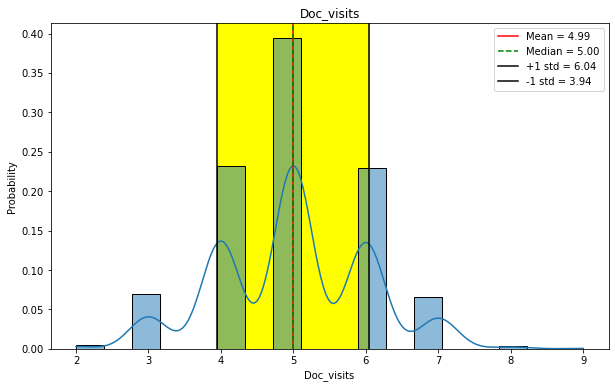

In [6]:
# Plot a histogram with a kde (kernel density estimate)
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability', kde = True)
ax.axvline(mean, color = 'red', label= f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

b) Answer the following questions:
- Is it Discrete or Continuous?

<b>Answer: It is discrete. The histogram bars have gaps in between them.

- Does it have a skew? If so, which direction (+/-)
    
<b>Answer: It does not have a skew
    
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    
<b>Answer: It displays 'Mesokurtic.'

In [7]:
# Confirm that our dataset is discrete
df['Doc_visits'].value_counts().sort_index()

2      5
3     69
4    232
5    394
6    229
7     66
8      4
9      1
Name: Doc_visits, dtype: int64

- Considering the values in the 'Doc_visits' column are integers, we can confirm that our dataset is discrete.

In [8]:
# Confirm that there is no skew
skew1 = stats.skew(feature)
f'{skew1:,.2f}'

'0.03'

- Considering the above calculation gives approximately 0.0, we can confirm that there is no skew in our data set

In [9]:
# Confirm that it displays 'Mesokurtic.'
kurt1 = stats.kurtosis(feature, fisher = False)
kurt1

2.9919958083381206

- The Kurtosis is approximately 3, confirming that the display is Mesokurtic

## 3. TotalCharge

a) Plot a histogram with a kde (kernel density estimate)

    Add a line for the mean (red)
    Add a line for the median (green)
    Add a line for for +1 std from the mean (black)
    Add a line for the - 1 std from the mean (black)
    Highlight the range between +1 and =1 std (yellow)



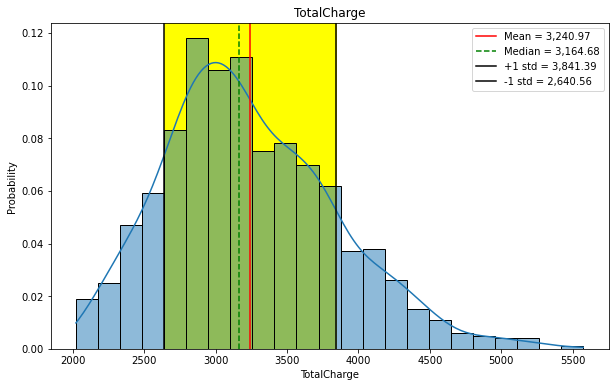

In [10]:
# Plot a histogram with a kde (kernel density estimate)
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability', kde = True)
ax.axvline(mean, color = 'red', label= f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

b) Answer the following questions:
- Is it Discrete or Continuous?

<b>Answer: It is continuous.The histogram bars do not have gaps in between them.

- Does it have a skew? If so, which direction (+/-)
    
<b>Answer: It looks like there is a skew. The skew is to the positive direction. 
    
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    
<b>Answer: It displays 'Mesokurtic.'

In [11]:
# Confirm the skew
skew2 = stats.skew(feature)
f'{skew2:,.2f}'

'0.58'

- Considering the above calculation gives 0.58, it seems like there is a skew in our data set.

In [12]:
# Confirm that it displays 'Mesokurtic.'
kurt2 = stats.kurtosis(feature, fisher = False)
kurt2

3.2650077463439384

- The Kurtosis is a bit higher than 3 but it is approximately 3. We can say that the display is Mesokurtic.